In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
dataset=load_iris()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
dataset['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [ ]:
dataset.data.shape

(150, 4)

In [ ]:
dataset.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
dataset.data[0].reshape(2,2)

array([[5.1, 3.5],
       [1.4, 0.2]])

<Figure size 640x480 with 0 Axes>

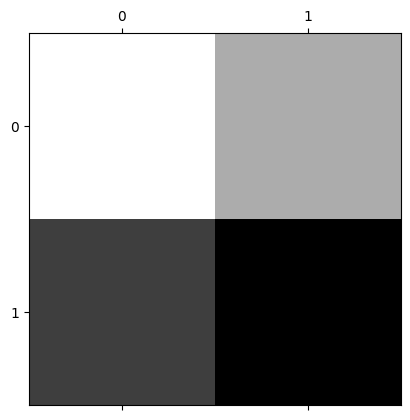

In [ ]:
from ast import increment_lineno
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(2,2))

In [ ]:
dataset.target[:5]

array([0, 0, 0, 0, 0])

In [ ]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = df
y=dataset.target

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9722222222222222

In [ ]:
X.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)


0.6083333333333333